In [3]:
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
import gensim.downloader as api
from gensim.models.word2vec import Text8Corpus

text8_path = api.load('text8', return_path=True)

[==================================================] 100.0% 31.6/31.6MB downloaded


In [4]:
cbow_model = Word2Vec(Text8Corpus(text8_path),min_count=1, window=2)
skip_gram_model = Word2Vec(Text8Corpus(text8_path),min_count=1,window=2,sg=1)

In [5]:
cbow_model.wv.similarity("science","fiction")

0.5854249

In [6]:
cbow_model.wv.similarity("science","jogging")

0.18758419

In [7]:
skip_gram_model.wv.similarity("science","physics")

0.70440114

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/maximus1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/maximus1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/maximus1/nltk_data...


In [9]:
df = pd.read_csv('/home/maximus1/Downloads/tweet_emotions.csv')

In [10]:
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [11]:
# removing empty sentiment
pruned_df = df[df['sentiment']!='empty']
pruned_df# removing empty sentiment
pruned_df = df[df['sentiment']!='empty']
pruned_df

,tweet_id,sentiment,content
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [12]:
pruned_df.describe

<bound method NDFrame.describe of          tweet_id   sentiment  \
1      1956967666     sadness   
2      1956967696     sadness   
3      1956967789  enthusiasm   
4      1956968416     neutral   
5      1956968477       worry   
...           ...         ...   
39995  1753918954     neutral   
39996  1753919001        love   
39997  1753919005        love   
39998  1753919043   happiness   
39999  1753919049        love   

                                                 content  
1      Layin n bed with a headache  ughhhh...waitin o...  
2                    Funeral ceremony...gloomy friday...  
3                   wants to hang out with friends SOON!  
4      @dannycastillo We want to trade with someone w...  
5      Re-pinging @ghostridah14: why didn't you go to...  
...                                                  ...  
39995                                   @JohnLloydTaylor  
39996                     Happy Mothers Day  All my love  
39997  Happy Mother's Day to all the m

In [13]:
#checking null values
pruned_df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

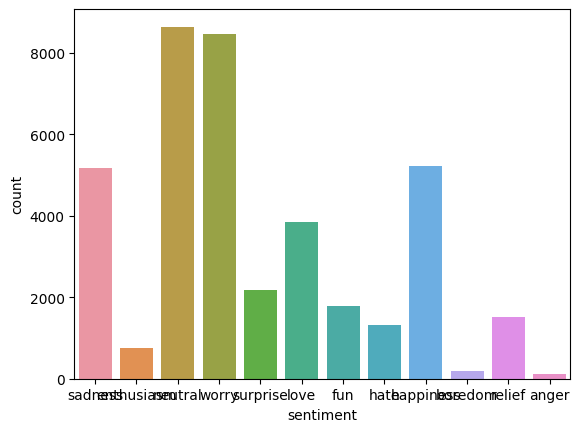

In [14]:
# let's have a look at the distribution of data across various sentiments.
sns.countplot(x ='sentiment', data = pruned_df)

In [15]:
def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    text = text.split()
    text = [lemmatizer.lemmatize(y) for y in text]
    return " ".join(text)

In [16]:
#2. Remove stopwords
def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

In [17]:
#3. Remove numbers
def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

In [18]:
#4. lower case
def lower_case(text):
    
    text = text.split()

    text=[y.lower() for y in text]
    
    return " " .join(text)

In [19]:
# 5. Remove punctuations
def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

In [20]:
#6. Remove urls
def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [21]:
def normalize_text(df):
    df.content=df.content.apply(lambda text : lower_case(text))
    df.content=df.content.apply(lambda text : remove_stop_words(text))
    df.content=df.content.apply(lambda text : Removing_numbers(text))
    df.content=df.content.apply(lambda text : Removing_punctuations(text))
    df.content=df.content.apply(lambda text : Removing_urls(text))
    df.content=df.content.apply(lambda text : lemmatization(text))
    return df

In [22]:
pruned_df= normalize_text(pruned_df)

/home/maximus1/Desktop/home/Desktop/envs/myenv/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
pruned_df

,tweet_id,sentiment,content
1,1956967666,sadness,layin n bed headache ughhhh waitin call
2,1956967696,sadness,funeral ceremony gloomy friday
3,1956967789,enthusiasm,want hang friend soon
4,1956968416,neutral,dannycastillo want trade someone houston ticke...
5,1956968477,worry,re pinging ghostridah go prom bc bf like friend
...,...,...,...
39995,1753918954,neutral,johnlloydtaylor
39996,1753919001,love,happy mother day love
39997,1753919005,love,happy mother s day mommy there woman man long ...
39998,1753919043,happiness,niariley wassup beautiful follow me peep new h...


In [24]:
X = pruned_df['content'].values
y = pruned_df['sentiment'].values

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=0)
print("Shape of X_train",X_train.shape)
print("Shape of X test",X_test.shape)

Shape of X_train (33297,)
Shape of X test (5876,)


In [27]:
# training decision tree
decision_tree = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', DecisionTreeClassifier(random_state = 0))])

In [28]:
decision_tree.fit(X_train,y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', DecisionTreeClassifier(random_state=0))])

In [29]:
y_pred=decision_tree.predict(X_test)

In [30]:
decision_tree_accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of Decision tree is {}".format(decision_tree_accuracy))

The accuracy of Decision tree is 0.2704220558202859


In [31]:
# f1 score
decision_tree_f1=f1_score(y_test,y_pred, average=None)
pd.DataFrame(decision_tree_f1, index=pruned_df.sentiment.unique(), columns=['F1 score']) 

,F1 score
sadness,0.000000
enthusiasm,0.000000
neutral,0.010526
worry,0.084706
surprise,0.246210
love,0.237569
fun,0.337640
hate,0.354975
happiness,0.080214
boredom,0.241077


In [32]:
# training random forests
random_forests = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', RandomForestClassifier(random_state = 0))])

In [33]:
random_forests.fit(X_train,y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', RandomForestClassifier(random_state=0))])

In [34]:
y_pred=random_forests.predict(X_test)

In [35]:
random_forests_accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of Random forests is {}".format(random_forests_accuracy))

The accuracy of Random forests is 0.3407079646017699


In [36]:
# training logistic regression
log_reg = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', LogisticRegression(solver='liblinear',random_state = 0))])

In [37]:
log_reg.fit(X_train,y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 LogisticRegression(random_state=0, solver='liblinear'))])

In [38]:
y_pred=log_reg.predict(X_test)

In [39]:
log_reg_accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of Logistic Regression is {}".format(log_reg_accuracy))

The accuracy of Logistic Regression is 0.3563648740639891


In [ ]:
#### These are some supervised models applied for sentiment classification.